# The train-test split

### 1. Two-way split

### 2. Three-way split
This technique involves splitting a dataset into **three distinct parts**:
- **Training set**, - **Validation set**, - **Testing set** 

splitting the training data into training and validation sets would remove precious observations for the training process.

### 3. Cross-validation

### 4. The train-test split in Python

### Importing data and libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns

We will use data on the **Rand exchange rates over time**:

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Explore-AI/Public-Data/master/Data/regression_sprint/regression_sprint_data_1.csv', index_col=0)
df.head(10)

,ZAR/USD,Value of Exports (ZAR)
2008M01,7.01,39356.82
2008M02,7.66,46946.33
2008M03,7.97,51150.89
2008M04,7.79,56174.34
2008M05,7.62,56240.45
2008M06,7.92,60159.93
2008M07,7.63,61268.16
2008M08,7.66,60390.94
2008M09,8.06,61067.34
2008M10,9.74,65652.57


### Using the `train_test_split`  function from sklearn

In [3]:
# Import the split function from sklearn
from sklearn.model_selection import train_test_split

In [4]:
# Split the dataset into the response, y, and features, X
y = df['ZAR/USD']
X = df.drop('ZAR/USD', axis=1)

In [5]:
# Call the 'train_test_split' function:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

### Plotting the training and testing sets

By plotting the data points in each of the training and testing sets in different colours, we should be able to see that we have a **similar _spread_ of data** in each (but far fewer data _points_ in the testing set).

In [ ]:
# Plot the splitting results
plt.scatter(X_train, y_train, color='green', label='Training')  # plot the training data in green
plt.scatter(X_test, y_test, color='darkblue', label='Testing')  # plot the testing data in blue
plt.legend()
plt.show()

### Training a linear model

In [9]:
# Import the linear regression module
from sklearn.linear_model import LinearRegression

In [10]:
# Declare the model object
lm = LinearRegression()

In [11]:
# Fit the model to the training data 
lm.fit(X_train, y_train)

LinearRegression()

In [12]:
# Extract the intercept, or y-cut, of our linear model
a = float(lm.intercept_)

In [13]:
# Extract the coefficient, or gradient, of our linear model
b = lm.coef_

In [14]:
print("Slope:\t\t", b)
print("Intercept:\t", float(a))

Slope:		 [0.0001199]
Intercept:	 1.4542630444144784


### Assessing the model on the training data

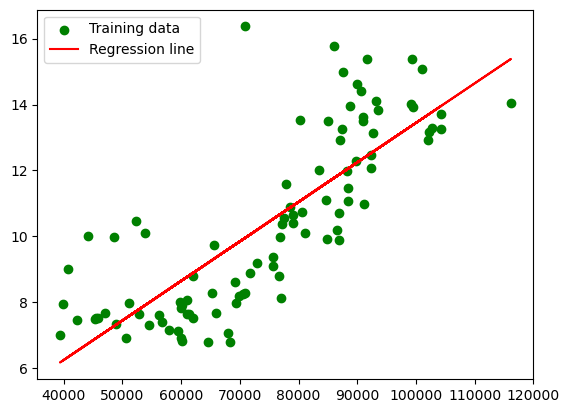

In [15]:
# Generate the values that fall along our regression line
gen_y = lm.predict(X_train)

# Plot the results
plt.scatter(X_train, y_train, color='green', label='Training data')  # Plot the training data in green
plt.plot(X_train, gen_y, color='red', label='Regression line')  # Plot the line connecting the generated y-values
plt.legend()
plt.show()

In [16]:
from sklearn import metrics

In [17]:
print("Training:")
# Calculate the mean-squared-error
print('MSE:', metrics.mean_squared_error(y_train, gen_y))
# Calculate the R-squared metric
print('R_squared:', metrics.r2_score(y_train, gen_y))

Training:
MSE: 2.612547537558907
R_squared: 0.6402293095045937


### Assessing the model on the testing (unseen) data

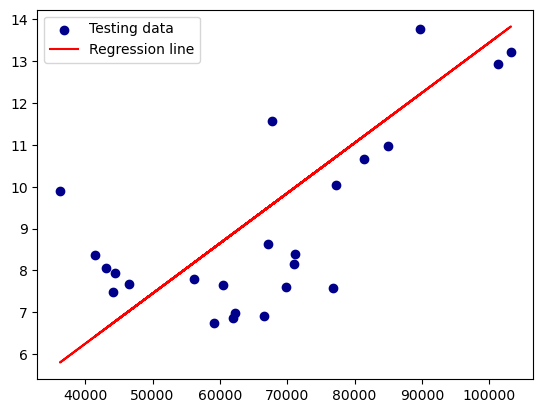

In [18]:
# Generate values of y from x, using the linear model
gen_y_test = lm.predict(X_test)

# Plot the results
plt.scatter(X_test, y_test, color='darkblue', label='Testing data')  # Plot the testing data in blue
plt.plot(X_test, gen_y_test, color='red', label='Regression line')  # Plot the line connecting the generated y-values in red
plt.legend()
plt.show()

In [19]:
print("Testing:")
print('MSE:', metrics.mean_squared_error(y_test, gen_y_test))
print('R_squared:', metrics.r2_score(y_test, gen_y_test))

Testing:
MSE: 3.038981977599917
R_squared: 0.3003104341257886


### Observation

**Mean squared error** is higher on the test set than the train set, indicating poor predictive accuracy.

**R-squared** is lower on the test set, indicating a worse fit on the test set.

The term comes from the fact that the model **fits too well, or overfits, the training data**, and does not fit well, or **underfits, the testing data**. 